In [36]:
from pandas import DataFrame, read_csv
from seaborn import scatterplot, countplot
from sklearn.cluster import KMeans

In [25]:
data: DataFrame = read_csv("./data/housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

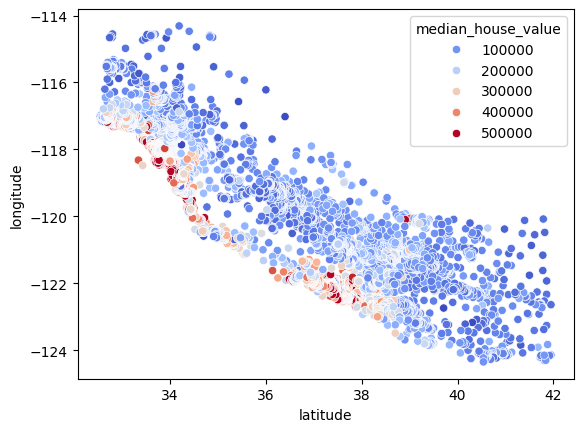

In [ ]:
scatterplot(
	data=data,
	x="latitude",
	y="longitude",
	hue="median_house_value",
	palette="coolwarm"
)

<Axes: xlabel='latitude', ylabel='longitude'>

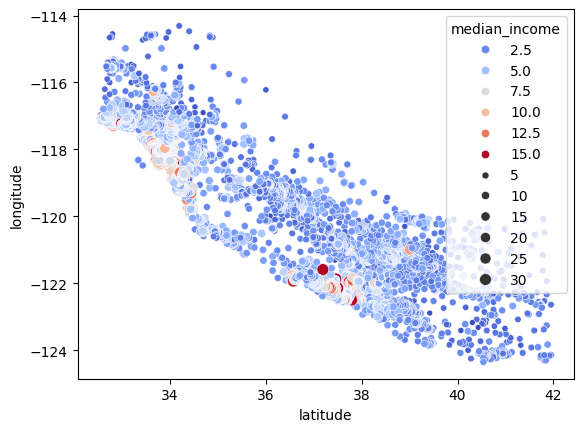

In [ ]:
scatterplot(
	data=data,
	x="latitude",
	y="longitude",
	hue="median_income",
	palette="coolwarm",
	size=data["median_income"]
)

In [26]:
X: DataFrame = data.loc[:, ["latitude", "longitude", "median_income"]]
X

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [30]:
model = KMeans(n_clusters=6)
predictions = model.fit_predict(X)

In [32]:
X["cluster"] = predictions
X["cluster"].value_counts()

cluster
0    4848
3    4540
4    4508
1    3467
2    2627
5     650
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

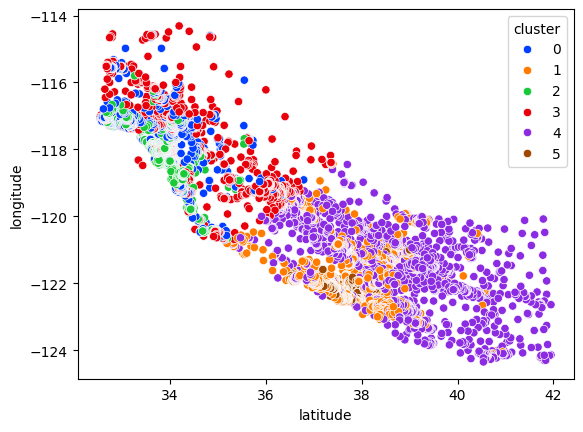

In [34]:
scatterplot(
	data=X,
	x="latitude",
	y="longitude",
	hue="cluster",
	palette="bright"
)

<Axes: xlabel='cluster', ylabel='count'>

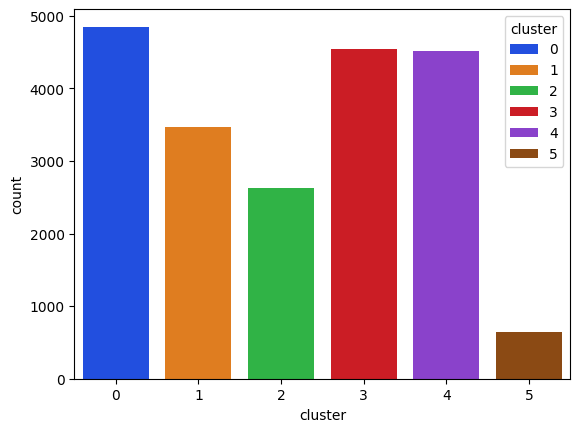

In [39]:
countplot(x="cluster", data=X, palette="bright", hue="cluster")

In [40]:
X.groupby(["cluster"])["median_income"].mean()

cluster
0    3.936886
1    4.652325
2    6.693333
3    2.265099
4    2.526427
5    8.336844
Name: median_income, dtype: float64